In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

In [2]:
import sys
sys.path.append('..')
from helpers import try_load_dict

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Helvetica"
})

bigger_font_size=10
column_width = 3.375
double_stack=(column_width,column_width)
double_stack=(0.75*column_width,0.7*column_width)

red = plt.get_cmap("Reds")
blue = plt.get_cmap("Blues")
green = plt.get_cmap("Greens")

data_prepend = './'
data_prepend = 'public_data/'


In [4]:
FE_exp = 'M1_largeWidths'
FE_x = np.load(data_prepend + f'{FE_exp}/IsingChain_h-1.0_N12/FullEnum/hellinger/bs_64/params_Hilbert_ratio.npy')
FE_train = np.load(data_prepend + f'{FE_exp}/IsingChain_h-1.0_N12/FullEnum/hellinger/bs_64/final_train_losses.npy')
FE_train_var = np.load(data_prepend + f'{FE_exp}/IsingChain_h-1.0_N12/FullEnum/hellinger/bs_64/final_train_losses_var.npy')
FE_train_err = np.sqrt(FE_train_var)/np.sqrt(10)
FE_fidelities = np.load(data_prepend + f'{FE_exp}/IsingChain_h-1.0_N12/FullEnum/hellinger/bs_64/final_fidelities.npy')
FE_fidelities_var = np.load(data_prepend + f'{FE_exp}/IsingChain_h-1.0_N12/FullEnum/hellinger/bs_64/final_fidelities_var.npy')
FE_fidelities_err = np.sqrt(FE_fidelities_var)/np.sqrt(10)

In [5]:
QGT_exp = 'M7'
QGT_x = np.load(data_prepend + f'{QGT_exp}/IsingChain_h-1.0_N12/FullEnumQGT/infidelity/not_batched/params_Hilbert_ratio.npy')
QGT_fidelities = np.load(data_prepend + f'{QGT_exp}/IsingChain_h-1.0_N12/FullEnumQGT/infidelity/not_batched/final_fidelities.npy')
QGT_fidelities_var = np.load(data_prepend + f'{QGT_exp}/IsingChain_h-1.0_N12/FullEnumQGT/infidelity/not_batched/final_fidelities_var.npy')
QGT_fidelities_err = np.sqrt(QGT_fidelities_var)/np.sqrt(10)

## MAIN

#### Figure 1

In [6]:
exp_name = 'A29_largeWidths'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

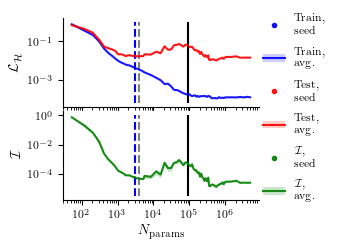

In [8]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)

seeds = np.arange(10,101,10)
show_seeds = False

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax[0].scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax[0].scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax[0].errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax[0].fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax[0].errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax[0].fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)

ax[0].vlines(2**N,6*10**-5,10**0,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,6*10**-5,10**0,linestyle='--',color='b',zorder=-1)
ax[0].vlines(9*10**4,6*10**-5,10**0,linestyle='-',color='k',zorder=-1)

ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\mathcal{L}_\mathcal{H}$',fontsize=bigger_font_size)
  

### Subplot 2

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax[1].scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax[1].fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax[1].vlines(2**N,3*10**-6,10**0,linestyle='--',color='grey',zorder=-1)
ax[1].vlines(2**N*frac_train,3*10**-6,10**0,linestyle='--',color='b',zorder=-1)
ax[1].vlines(9*10**4,3*10**-6,10**0,linestyle='-',color='k',zorder=-1)

ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\mathcal{I}$',fontsize=bigger_font_size)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line),
    marker, (patch,line)]
labels = [train_marker.get_label(),train_line.get_label(),
          test_marker.get_label(),test_line.get_label(),
          marker.get_label(),line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)


plt.savefig(f'./figures/doubleDescent_probs_largeWidths.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

#### Figure 2

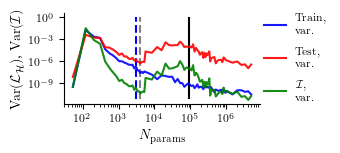

In [9]:
fig,ax = plt.subplots(1, 1, figsize=(0.75*column_width,0.35*column_width))
fig.subplots_adjust(hspace=0.05)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax.errorbar(x,train_var/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax.errorbar(x,test_var/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')
ax.errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$')

ax.vlines(2**N,8*10**-12,10**0,linestyle='--',color='grey',zorder=-2)
ax.vlines(2**N*frac_train,8*10**-12,10**0,linestyle='--',color='b',zorder=-2)
ax.vlines(9*10**4,8*10**-12,10**0,linestyle='-',color='k',zorder=-2)

ax.set_yscale('log')
ax.set_ylabel(r'$\mathrm{Var}(\mathcal{L}_\mathcal{H})$, $\mathrm{Var}(\mathcal{I})$',fontsize=bigger_font_size)

ax.set_xscale('log')
ax.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{var.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{var.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{var.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_line,
    test_line,
    line]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_vars_probs_largeWidths_single.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

#### Figure 5, supplement

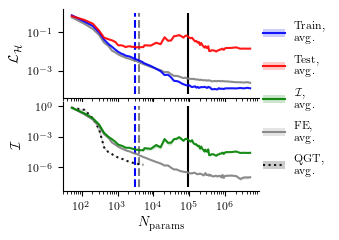

In [10]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)

ax[0].errorbar(FE_x*2**N,FE_train,
            marker='None',linestyle='-',
            c='grey',mfc="white",alpha=0.9,label=r'$\mathrm{FE}$')
ax[0].fill_between(FE_x*2**N,(FE_train)-FE_train_err,(FE_train)+FE_train_err,linewidth=0,color='grey',alpha=0.2)


path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax[0].errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax[0].fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax[0].errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax[0].fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)

ax[0].vlines(2**N,6*10**-5,10**0,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,6*10**-5,10**0,linestyle='--',color='b',zorder=-1)
ax[0].vlines(9*10**4,6*10**-5,10**0,linestyle='-',color='k',zorder=-1)

ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\mathcal{L}_\mathcal{H}$',fontsize=bigger_font_size)

### Subplot 2

ax[1].errorbar(FE_x*2**N,1-FE_fidelities,
            marker='None',linestyle='-',
            c='grey',mfc="white",alpha=0.9,label=r'$\mathrm{FE}$')
ax[1].fill_between(FE_x*2**N,(1-FE_fidelities)-FE_fidelities_err,(1-FE_fidelities)+FE_fidelities_err,linewidth=0,color='grey',alpha=0.2)
ax[1].errorbar(QGT_x*2**N,1-QGT_fidelities,
        color='k',alpha=0.9,linestyle=':',label=r'$\mathrm{FE + QGT}$',zorder=-1)
ax[1].fill_between(QGT_x*2**N,(1-QGT_fidelities)-QGT_fidelities_err,(1-QGT_fidelities)+QGT_fidelities_err,linewidth=0,color='k',alpha=0.2)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax[1].fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax[1].vlines(2**N,10**-8,10**0,linestyle='--',color='grey',zorder=-1)
ax[1].vlines(2**N*frac_train,10**-8,10**0,linestyle='--',color='b',zorder=-1)
ax[1].vlines(9*10**4,10**-8,10**0,linestyle='-',color='k',zorder=-1)

ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\mathcal{I}$',fontsize=bigger_font_size)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
FE_line = plt.Line2D([0], [0], color='grey',alpha=0.9,label=r'$\mathrm{FE},$'+'\n'+r'$\mathrm{avg.}$')
FE_patch = mpatches.Patch(color='grey',alpha=0.2,linewidth=0)
QGT_line = plt.Line2D([0], [0], color='k',linestyle=':',alpha=0.9,label=r'$\mathrm{QGT},$'+'\n'+r'$\mathrm{avg.}$')
QGT_patch = mpatches.Patch(color='k',alpha=0.2,linewidth=0)
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    (train_patch,train_line),
    (test_patch,test_line),
    (patch,line),
    (FE_patch,FE_line),
    (QGT_patch,QGT_line)]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label(),
          FE_line.get_label(),
          QGT_line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_FE.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

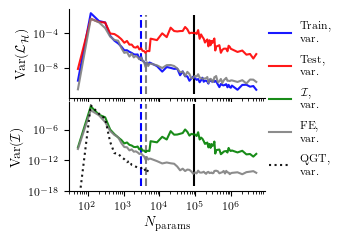

In [11]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)


path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax[0].errorbar(x,train_var/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax[0].errorbar(x,test_var/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')


ax[0].errorbar(FE_x*2**N,FE_train_var,
            marker='None',linestyle='-',
            c='grey',mfc="white",alpha=0.9,label=r'$\mathrm{FE}$')

ax[0].vlines(2**N,10**-11,10**-2,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,10**-11,10**-2,linestyle='--',color='b',zorder=-1)
ax[0].vlines(9*10**4,10**-11,10**-2,linestyle='-',color='k',zorder=-1)

ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\mathrm{Var}(\mathcal{L}_\mathcal{H})$',fontsize=bigger_font_size)

### Subplot 2

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$')

ax[1].errorbar(FE_x*2**N,FE_fidelities_var,
            marker='None',linestyle='-',
            c='grey',mfc="white",alpha=0.9,label=r'$\mathrm{FE}$')
ax[1].errorbar(QGT_x*2**N,QGT_fidelities_var,
        color='k',alpha=0.9,linestyle=':',
        label=r'$\mathrm{QGT}$')

ax[1].vlines(2**N,10**-17,10**-1,linestyle='--',color='grey',zorder=-2)
ax[1].vlines(2**N*frac_train,10**-17,10**-1,linestyle='--',color='b',zorder=-2)
ax[1].vlines(9*10**4,10**-17,10**-1,linestyle='-',color='k',zorder=-2)

ax[1].set_yscale('log')
ax[1].set_ylim(10**-18,2*10**-1)
ax[1].set_ylabel(r'$\mathrm{Var}(\mathcal{I})$',fontsize=bigger_font_size)

ax[1].set_xscale('log')
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{var.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{var.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{var.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
FE_line = plt.Line2D([0], [0], color='grey',alpha=0.9,label=r'$\mathrm{FE},$'+'\n'+r'$\mathrm{var.}$')
FE_patch = mpatches.Patch(color='grey',alpha=0.2,linewidth=0)
QGT_line = plt.Line2D([0], [0], color='k',linestyle=':',alpha=0.9,label=r'$\mathrm{QGT},$'+'\n'+r'$\mathrm{var.}$')
QGT_patch = mpatches.Patch(color='k',alpha=0.2,linewidth=0)
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_line,
    test_line,
    line,
    FE_line,
    QGT_line]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label(),
          FE_line.get_label(),
          QGT_line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_vars_FE.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

# Sampling with replacement

#### Figure 6

In [12]:
exp_name = 'Jul11'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

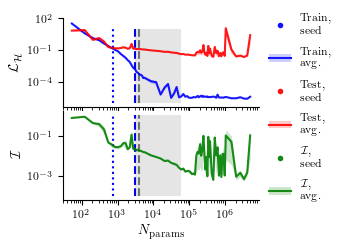

In [13]:
big_double_stack = (2*column_width,2*column_width)
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)

seeds = np.arange(10,101,10)
show_seeds = False

if show_seeds:
    actual_test_sizes = []
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_mc/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        actual_test_size = np.load(path+'actual_test_size.npy')
        actual_frac_test = actual_test_size/2**N
        actual_frac_train = 1-actual_frac_test
        actual_test_sizes.append(actual_test_size)
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/actual_frac_train)
                test_losses.append(test_losses_dict[key][-1]/actual_frac_test)
        ax[0].scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax[0].scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

    avg_test_size = np.mean(actual_test_sizes)
    print(avg_test_size)
    avg_test_frac = avg_test_size/2**N
    avg_train_frac = 1-avg_test_frac
else:
    avg_test_size = 2**N - 728  # hard coded based on number in the text
    avg_test_frac = avg_test_size/2**N
    avg_train_frac = 1-avg_test_frac


path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_mc/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/avg_train_frac)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/avg_test_frac)/np.sqrt(10)
ax[0].errorbar(x,train_losses/avg_train_frac,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax[0].fill_between(x,(train_losses/avg_train_frac)-train_err,(train_losses/avg_train_frac)+train_err,linewidth=0,color='b',alpha=0.2)
ax[0].errorbar(x,test_losses/avg_test_frac,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax[0].fill_between(x,(test_losses/avg_test_frac)-test_err,(test_losses/avg_test_frac)+test_err,linewidth=0,color='r',alpha=0.2)

ax[0].vlines(2**N,10**-6,10**1,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,10**-6,10**1,linestyle='--',color='b',zorder=-1)
ax[0].vlines(2**N*avg_train_frac,10**-6,10**1,linestyle=':',color='b',zorder=-1)
ax[0].fill_betweenx([10**-6,10**1], np.ones((2))*2**N*frac_train, np.ones((2))*6*10**4,color='k',alpha=0.1,zorder=-1,linewidth=0)

ax[0].set_yscale('log')
ax[0].set_ylim(4*10**-7,10**2)
ax[0].set_ylabel(r'$\mathcal{L}_\mathcal{H}$',fontsize=bigger_font_size)

### Subplot 2

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_mc/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax[1].scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_mc/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax[1].fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax[1].vlines(2**N,10**-4,10**0,linestyle='--',color='grey',zorder=-1)
ax[1].vlines(2**N*frac_train,10**-4,10**0,linestyle='--',color='b',zorder=-1)
ax[1].vlines(2**N*avg_train_frac,10**-4,10**0,linestyle=':',color='b',zorder=-1)
ax[1].fill_betweenx([10**-4,10**0], np.ones((2))*2**N*frac_train, np.ones((2))*6*10**4,color='k',alpha=0.1,zorder=-1,linewidth=0)

ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylabel(r'$\mathcal{I}$',fontsize=bigger_font_size)
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line),
    marker, (patch,line)]
labels = [train_marker.get_label(),train_line.get_label(),
          test_marker.get_label(),test_line.get_label(),
          marker.get_label(),line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.9,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_mc.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

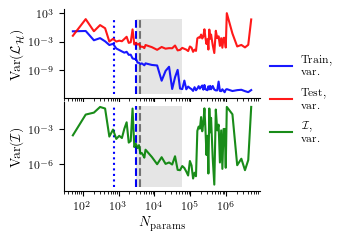

In [14]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)


path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_mc/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/avg_train_frac)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/avg_test_frac)/np.sqrt(10)
ax[0].errorbar(x,train_var/avg_train_frac,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax[0].errorbar(x,test_var/avg_test_frac,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')

ax[0].vlines(2**N,10**-14,5*10**1,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,10**-14,5*10**1,linestyle='--',color='b',zorder=-1)
ax[0].vlines(2**N*avg_train_frac,10**-14,5*10**1,linestyle=':',color='b',zorder=-1)
ax[0].fill_betweenx([10**-14,5*10**1], np.ones((2))*2**N*frac_train, np.ones((2))*6*10**4,color='k',alpha=0.1,zorder=-1,linewidth=0)

ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\mathrm{Var}(\mathcal{L}_\mathcal{H})$',fontsize=bigger_font_size)

### Subplot 2

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_mc/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$')

ax[1].vlines(2**N,10**-8,10**-1,linestyle='--',color='grey',zorder=-2)
ax[1].vlines(2**N*frac_train,10**-8,10**-1,linestyle='--',color='b',zorder=-2)
ax[1].vlines(2**N*avg_train_frac,10**-8,10**-1,linestyle=':',color='b',zorder=-2)
ax[1].fill_betweenx([10**-8,10**-1], np.ones((2))*2**N*frac_train, np.ones((2))*6*10**4,color='k',alpha=0.1,zorder=-1,linewidth=0)

ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\mathrm{Var}(\mathcal{I})$',fontsize=bigger_font_size)

ax[1].set_xscale('log')
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{var.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{var.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{var.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_line,
    test_line,
    line]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.9,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_vars_mc.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

# Smaller training dataset

#### Figure 5

In [15]:
exp_name = 'Jul12'
N = 12

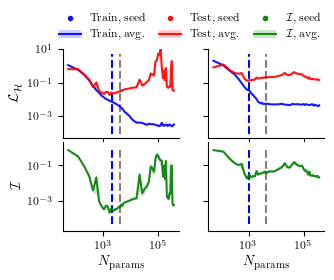

In [18]:
fig,ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(column_width,0.7*column_width))
fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.25)
ax0 = ax[0,0]
ax1 = ax[1,0]
ax2 = ax[0,1]
ax3 = ax[1,1]

seeds = np.arange(10,101,10)
show_seeds = False

# 50:50 splitting ####################################################
frac_test = 0.5
frac_train = 1-frac_test

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax0.scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax0.scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax0.errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax0.fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax0.errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax0.fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)
  
if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax1.scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)


path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax1.errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax1.fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax0.vlines(2**N,8*10**-5,5*10**0,linestyle='--',color='grey',zorder=-1)
ax0.vlines(2**N*frac_train,8*10**-5,5*10**0,linestyle='--',color='b',zorder=-1)

ax1.vlines(2**N,5*10**-5,10**0,linestyle='--',color='grey',zorder=-1)
ax1.vlines(2**N*frac_train,5*10**-5,10**0,linestyle='--',color='b',zorder=-1)

######################################################################


# 25:75 splitting ####################################################
frac_test = 0.75
frac_train = 1-frac_test

if show_seeds:
    for seed in seeds:
        path = f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax2.scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax2.scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax2.errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax2.fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax2.errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax2.fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)
  
if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax3.scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax3.errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax3.fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax2.vlines(2**N,8*10**-5,5*10**0,linestyle='--',color='grey',zorder=-1)
ax2.vlines(2**N*frac_train,8*10**-5,5*10**0,linestyle='--',color='b',zorder=-1)

ax3.vlines(2**N,5*10**-5,10**0,linestyle='--',color='grey',zorder=-1)
ax3.vlines(2**N*frac_train,5*10**-5,10**0,linestyle='--',color='b',zorder=-1)

######################################################################

ax0.set_yscale('log')
ax0.set_ylabel(r'$\mathcal{L}_\mathcal{H}$',fontsize=bigger_font_size)
ax1.set_yscale('log')
ax1.set_ylabel(r'$\mathcal{I}$',fontsize=bigger_font_size)
ax1.set_xscale('log')
ax1.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)
ax3.set_xscale('log')
ax3.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax0.set_ylim(5*10**-5,10**1)
ax1.set_ylim(2*10**-5,2*10**0)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line),
    marker, (patch,line)]
labels = [train_marker.get_label(),train_line.get_label(),
          test_marker.get_label(),test_line.get_label(),
          marker.get_label(),line.get_label()]
fig.legend(handles=handles, labels=labels,loc='lower center',ncol=3,columnspacing=1.2,frameon=False,bbox_to_anchor=(0.5,0.875))

plt.savefig(f'./figures/doubleDescent_probs_smallDataSets.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()